 This script demonstrates the use of various modules from the scikit-learn, pandas, numpy, re, matplotlib, seaborn, and plotly libraries for data preprocessing, linear regression modeling, and visualization.

    The script performs the following steps:
    1. Imports necessary libraries for data processing, modeling, and visualization.
    2. Loads the dataset using pandas for further analysis.
    3. Preprocesses the data (e.g., handling missing values, scaling numerical features, encoding categorical features) to prepare it for modeling.
    4. Splits the preprocessed data into training and testing sets for model training and evaluation.
    5. Trains a linear regression model on the training data to predict a target variable.
    6. Evaluates the trained model on the testing data using mean squared error to assess its performance.
    7. Performs clustering using KMeans to identify patterns or clusters in the data.
    8. Visualizes the data and model results using matplotlib, seaborn, and plotly for better understanding and insights.


In [ ]:
# Import the pandas library and alias it as pd for data manipulation and analysis
import pandas as pd
 # Import the numpy library and alias it as np for numerical operations
import numpy as np
 # Import the train_test_split function from sklearn.model_selection module for splitting the dataset
from sklearn.model_selection import train_test_split
 # Import the LinearRegression class from sklearn.linear_model module for linear regression modeling
from sklearn.linear_model import LinearRegression
 # Import the mean_squared_error function from sklearn.metrics module for evaluating the model
from sklearn.metrics import mean_squared_error
 # Import the KMeans class from sklearn.cluster module for clustering
from sklearn.cluster import KMeans
 # Import the StandardScaler class from sklearn.preprocessing module for standardizing features
from sklearn.preprocessing import StandardScaler
# Import the OneHotEncoder class from sklearn.preprocessing module for encoding categorical features
from sklearn.preprocessing import OneHotEncoder
 # Import the re module for working with regular expressions
import re
# Import the pyplot module from matplotlib library and alias it as plt for plotting
import matplotlib.pyplot as plt
 # Import the seaborn library and alias it as sns for data visualization
import seaborn as sns
# Import the express module from plotly library and alias it as px for interactive plotting
import plotly.express as px

This line reads a CSV file containing data about social media influencers on YouTube and stores it in a pandas DataFrame called data_youtube.

pd.read_csv: This function is used to read a CSV file into a pandas DataFrame.
"/content/sample_data/social media influencers - youtube (1).csv": This is the file path of the CSV file to be read. Replace this with the actual file path if it's different.
data_youtube: This is the variable name used to store the DataFrame containing the data from the CSV file. You can use a different variable name if you prefer.

In [ ]:

data_youtube = pd.read_csv("/content/sample_data/social media influencers - youtube (1).csv")

In [ ]:
data_youtube = pd.DataFrame(data_youtube)

The following function will help us to quickly inspect the structure and contentsof the DataFrame

In [ ]:
data_youtube.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K




The following function will rename the column 'channel name' in the `data_youtube` DataFrame to 'Creator Name'. The `rename()` method is used to change the name of a column in a pandas DataFrame. The `inplace=True` parameter is used to modify the DataFrame in place, meaning the original DataFrame is updated with the new column name.

In [ ]:
data_youtube.rename(columns={'channel name': 'Creator Name'}, inplace=True)

The following line will provide us with the number of rows and columns in the DataFrame.

In [ ]:
data_youtube.shape

(1000, 8)

In [ ]:
data_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   Creator Name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


The code data_youtube.isnull().sum() checks each column in the data_youtube DataFrame to see if it has any missing values. For each column, it counts how many missing values there are and returns the total count for each column.

In [ ]:
data_youtube.isnull().sum()

youtuber name         0
Creator Name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

 The following  code  removes rows from the `data_youtube` DataFrame where either the `'Audience Country'` or `'Category'` column has a missing value. The `subset` parameter specifies the columns to consider when checking for missing values. The `inplace=True` parameter means that the changes are made directly to the `data_youtube` DataFrame, without creating a new DataFrame.

In [ ]:
data_youtube.dropna(subset={'Audience Country', 'Category'}, inplace=True)

2648.978  mean comments





50129.625  mean likes

The following code fills missing values in the 'avg likes' and 'avg comments' columns of the data_youtube DataFrame with zeros (0). The fillna() method is used to fill missing values in a DataFrame. The value parameter is a dictionary where the keys are column names and the values are the values to use for filling missing values in those columns.

In [ ]:
data_youtube.fillna(value={'avg likes': 0, 'avg comments': 0}, inplace=True)

The following line will verify our operations

In [ ]:
data_youtube.isnull().sum()

youtuber name       0
Creator Name        0
Category            0
Subscribers         0
Audience Country    0
avg views           0
avg likes           0
avg comments        0
dtype: int64

This code snippet extracts the last character from each value in the 'Subscribers' column of the data_youtube DataFrame using the str[-1] accessor. It then counts the frequency of each unique last character using the value_counts() method. This can be useful for understanding the distribution of subscribers based on the last character of their subscriber count.

In [ ]:
data_youtube['Subscribers'].str[-1].value_counts()

Subscribers
M    609
Name: count, dtype: int64

The following function data_to_numeric takes a DataFrame df and a list of column names column_list, and converts the specified columns in the DataFrame to numeric values. It handles values with 'M' (million) and 'K' (thousand) suffixes, converting them appropriately. The function returns the DataFrame with the specified columns converted to numeric values.

In [ ]:
def data_to_numeric(df, column_list):
    """
    Converts specified columns in a DataFrame to numeric values, handling 'M' (million) and 'K' (thousand) suffixes.

    Args:
        df (DataFrame): The DataFrame containing the columns to be converted.
        column_list (list): A list of column names to be converted.

    Returns:
        DataFrame: The DataFrame with specified columns converted to numeric values.
    """
    for column_name in column_list:
        new_column_name = 'new_' + column_name
        if new_column_name not in df.columns:

            if df[column_name].dtype == 'object':
                # Convert the column to string
                df[new_column_name] = df[column_name].apply(str)
                # Remove 'M' and 'K' suffixes from values
                df[new_column_name] = df[new_column_name].apply(lambda x: x.replace('M', '') if 'M' in x else x)
                df[new_column_name] = df[new_column_name].apply(lambda x: x.replace('K', '') if 'K' in x else x)
                # Convert the column to numeric
                df[new_column_name] = pd.to_numeric(df[new_column_name], downcast='integer')
                # Multiply values by 1,000,000 for 'M' and by 1,000 for 'K'
                df[new_column_name] = np.where(df[column_name].str.contains('M'), df[new_column_name] * 1000000,
                                                 np.where(df[column_name].str.contains('K'), df[new_column_name] * 1000, df[new_column_name]))
                # Convert the column to integer
                df[new_column_name] = df[new_column_name].astype(int)
    return df

# Apply the function to convert columns to numeric
data_youtube = data_to_numeric(data_youtube, ['Subscribers', 'avg views', 'avg likes', 'avg comments'])

# Display the first few rows of the DataFrame
data_youtube.head()


,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000,323700,9800,290
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000,1400000,80800,4600
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000,30600000,1700000,67700
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000,76600,2800,163
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82700000,108700,4200,155


The following code  calculates the mean (average) value of the 'new_avg likes' column in the data_youtube DataFrame and stores it in the variable mean_likes. The mean() method is used to calculate the mean value of a Series (a single column of a DataFrame) in pandas.

The mean_likes variable now contains the average number of likes across all rows in the 'new_avg likes' column.

In [ ]:
mean_likes= data_youtube['new_avg likes'].mean()
mean_likes

66466.92939244663

The following code generates descriptive statistics for the numeric columns in the data_youtube DataFrame, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

In [ ]:
data_youtube.describe()

,new_Subscribers,new_avg views,new_avg likes,new_avg comments
count,6.090000e+02,6.090000e+02,6.090000e+02,609.000000
mean,1.709721e+07,1.244654e+06,6.646693e+04,3762.704433
std,1.367774e+07,4.107589e+06,2.632934e+05,16882.797787
min,9.200000e+06,0.000000e+00,0.000000e+00,0.000000
25%,1.090000e+07,6.190000e+04,1.800000e+03,79.000000
50%,1.330000e+07,2.879000e+05,1.120000e+04,412.000000
75%,1.760000e+07,1.100000e+06,5.570000e+04,1900.000000
max,2.121000e+08,8.050000e+07,5.600000e+06,313600.000000


**15 Most Followed Youtubers**

The following code removes duplicate rows from the data_youtube DataFrame based on the 'Creator Name' column. The drop_duplicates() method is used to drop duplicate rows, and the subset parameter specifies the column(s) to consider when identifying duplicates. This operation is useful for ensuring that each creator name is unique in the DataFrame.

In [ ]:
data_youtube.drop_duplicates(subset=['Creator Name'],inplace=True)

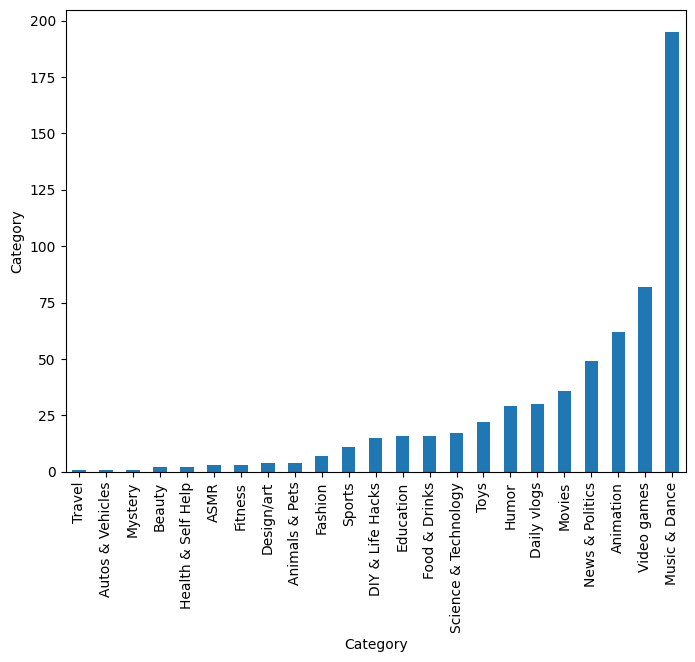

In [ ]:
def plot(df):
    """
    Plots a bar chart showing the frequency of each category in the 'Category' column of the DataFrame.

    Args:
        df (DataFrame): The DataFrame containing the 'Category' column to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    plt.xlabel('Number of Occurrences')  # Set the label for the x-axis
    plt.ylabel('Category')  # Set the label for the y-axis
    df['Category'].value_counts().sort_values(ascending=True).plot.bar()  # Plot the bar chart

plot(data_youtube)


The following code creates a horizontal bar plot using seaborn (sns.barplot) to visualize the top 15 YouTube channels with the most subscribers.

data = data_youtube.sort_values(by='new_Subscribers', ascending=False).head(15): Sorts the data_youtube DataFrame by the 'new_Subscribers' column in descending order and selects the top 15 rows, storing the result in the data variable.
plt.figure(figsize=(8, 10)): Sets the figure size for the plot.
graph = sns.barplot(y='Creator Name', x='new_Subscribers', data=data, hue='Subscribers', palette="tab10", clip_on=False): Creates the bar plot. The 'Creator Name' column is used for the y-axis, 'new_Subscribers' for the x-axis, and 'Subscribers' is used for the color hue. The palette="tab10" argument specifies the color palette to use, and clip_on=False ensures that bars are not clipped at the edges.
graph.set(xlabel="Subscribers count", title="Top 15 most followed YouTubers"): Sets the x-axis label to "Subscribers count" and the plot title to "Top 15 most followed YouTubers".
plt.show(): Displays the plot.

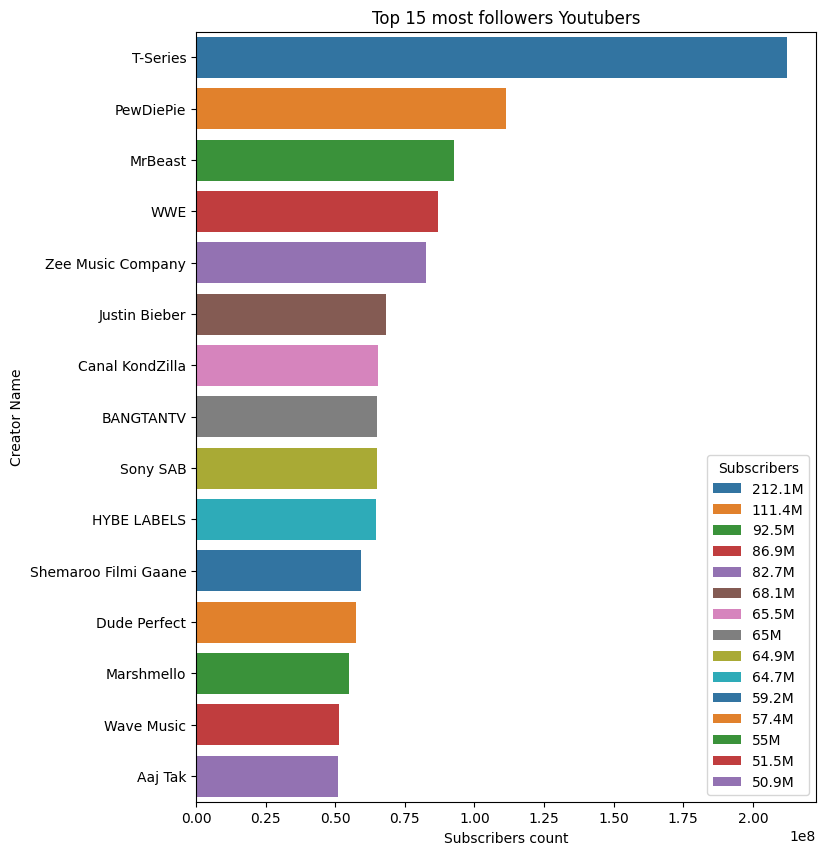

In [ ]:
data = data_youtube.sort_values(by='new_Subscribers',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='Creator Name',x='new_Subscribers',data= data, hue= 'Subscribers', palette="tab10", clip_on=False)
graph.set(xlabel="Subscribers count", title = "Top 15 most followers Youtubers")
plt.show()

**15 Most viewed Youtubers**

The following code creates a horizontal bar plot using seaborn (sns.barplot) to visualize the top 15 YouTube channels with the highest average views. Here's a breakdown of each part:

data = data_youtube.sort_values(by='new_avg views', ascending=False).head(15): Sorts the data_youtube DataFrame by the 'new_avg views' column in descending order and selects the top 15 rows, storing the result in the data variable.
plt.figure(figsize=(8, 10)): Sets the figure size for the plot.
graph = sns.barplot(y='Creator Name', x='new_avg views', data=data, hue='avg views', palette="tab10"): Creates the bar plot. The 'Creator Name' column is used for the y-axis, 'new_avg views' for the x-axis, and 'avg views' is used for the color hue. The palette="tab10" argument specifies the color palette to use.
graph.set(xlabel="Average Views", title="Top 15 Most Viewed YouTubers"): Sets the x-axis label to "Average Views" and the plot title to "Top 15 Most Viewed YouTubers".
plt.legend(title='Average Views'): Adds a legend to the plot with the title "Average Views".
plt.show(): Displays the plot.

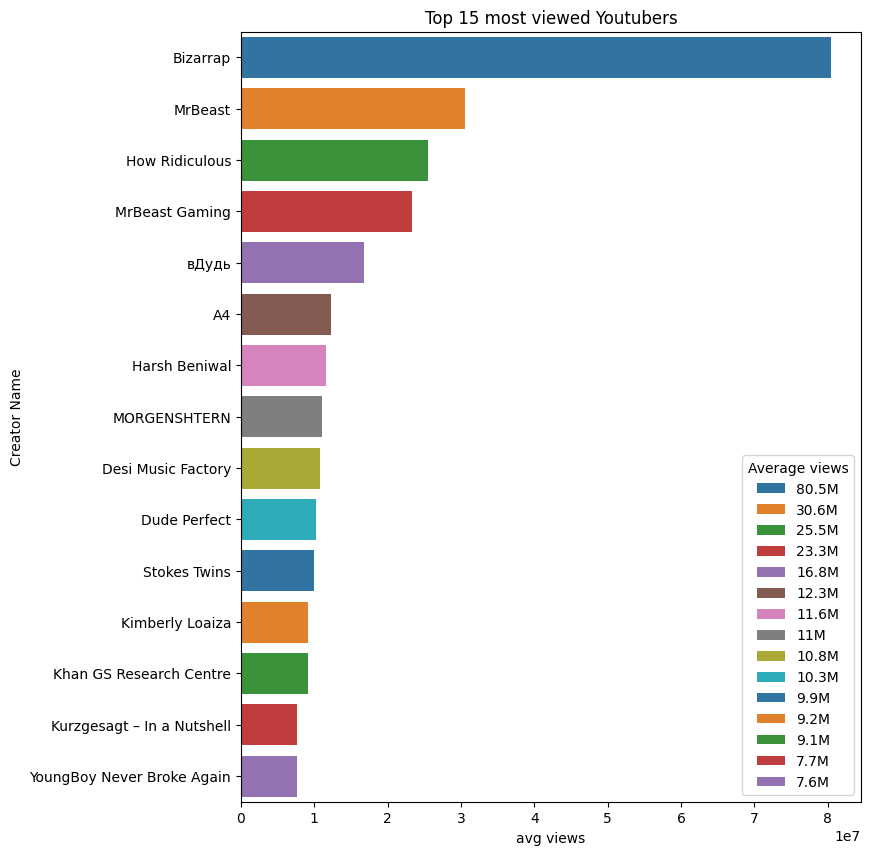

In [ ]:
data = data_youtube.sort_values(by='new_avg views',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='Creator Name', x='new_avg views', data=data, hue='avg views', palette="tab10")
graph.set(xlabel="avg views", title="Top 15 most viewed Youtubers")
plt.legend(title='Average views')
plt.show()

**Most viewed categories**

This code generates a bar plot using seaborn to show the average views for different categories on YouTube. It sorts the data by average views, plots the average views for each category, sets the x-axis label to "avg views," and sets the title of the plot to "Top 20 most viewed categories." Finally, it saves the plot as an image file and displays it.

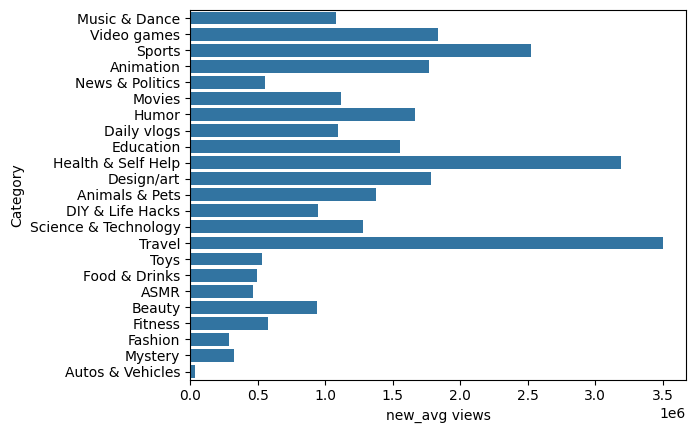

In [ ]:
data = data_youtube.sort_values(by='new_avg views',ascending=False)
gráfico = sns.barplot(y= 'Category' , x = 'new_avg views', data=data, errorbar=None)
graph.set(xlabel="avg views", title="Top 20 most viewed categories")
plt.savefig("most_viewed_categories_Youtube")
plt.show()

**Categories** **with** **more subscribers**

This code generates a bar plot using seaborn to visualize the number of subscribers for different categories in the `data_youtube` DataFrame. It first sorts the DataFrame by the number of subscribers in descending order and then creates a bar plot with categories on the y-axis and the number of subscribers on the x-axis. Finally, it sets the label for the x-axis to "Subscribers" and displays the plot.

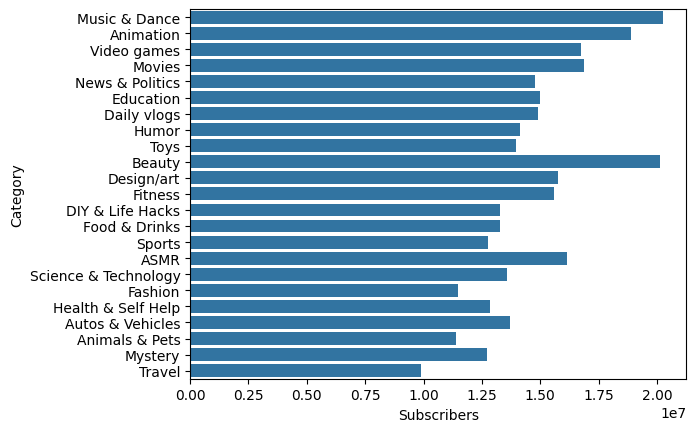

In [ ]:
data = data_youtube.sort_values(by='new_Subscribers',ascending=False)
# plt.figure(figsize = (12, 10))
graph = sns.barplot(y='Category', x='new_Subscribers', data=data, errorbar=None)
graph.set(xlabel="Subscribers")
plt.show()

In [ ]:
data_youtube.head()


,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000,323700,9800,290
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000,1400000,80800,4600
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000,30600000,1700000,67700
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000,76600,2800,163
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82700000,108700,4200,155


**Engagement Rate**

In an influencer campaign, marketers may want to examine engagement rates for specific posts. Using this metric, brands can gauge how well a creator’s post performed compared to that creator’s other content or past campaign posts.

Add( new_avg likes, new_avg comments) / new_avg views

This code snippet calculates the engagement rate for each entry in the data_youtube DataFrame and adds a new column called 'Engagement rate' to the DataFrame to store these values. Here's a brief explanation of the code:
Calculates the engagement rate as the sum of average comments, average likes, and average views divided by the number of subscribers, multiplied by 100 to get a percentage.
The round(..., 3) function is used to round the result to 3 decimal places.
Assigns the calculated values to a new column 'Engagement rate' in the data_youtube DataFrame.

In [ ]:
data_youtube['Engagement rate']=round(((data_youtube['new_avg comments']+data_youtube['new_avg likes']+data_youtube['new_avg views'])/data_youtube['new_Subscribers'])*100,3)
data_youtube.head()

,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000,323700,9800,290,0.157
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000,1400000,80800,4600,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000,30600000,1700000,67700,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000,76600,2800,163,0.092
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82700000,108700,4200,155,0.137


In [ ]:
data_youtube.head()

,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000,323700,9800,290,0.157
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000,1400000,80800,4600,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000,30600000,1700000,67700,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000,76600,2800,163,0.092
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82700000,108700,4200,155,0.137


In [ ]:
data_youtube.columns

Index(['youtuber name', 'Creator Name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'new_Subscribers', 'new_avg views', 'new_avg likes', 'new_avg comments',
       'Engagement rate'],
      dtype='object')



This code snippet creates a color palette using seaborn's `color_palette` function. The `"Set2"` argument specifies the name of the palette to use, which in this case is the Set2 palette. The second argument, `10`, specifies the number of colors in the palette.

In [ ]:
pallete = sns.color_palette("Set2", 10)

**Checking the demand for categories by Country wise**

This function demand takes a DataFrame data and a category category as input and plots a horizontal bar chart showing the audience demand by country for the specified category. The function filters the data for the specified category, counts the audience countries, and then plots a horizontal bar chart using the specified color palette (palette). The function returns the horizontal bar chart object.

In [ ]:
def demand(data, category):
    """
    Plots a horizontal bar chart showing the audience demand by country for a specific category.

    Args:
        data (DataFrame): The DataFrame containing the YouTube data.
        category (str): The category for which the audience demand should be plotted.

    Returns:
        matplotlib.axes._subplots.AxesSubplot: The horizontal bar chart.
    """
    # Filter the data for the specified category and count the audience countries
    audience_demand = data[data['Category'] == category]['Audience Country'].value_counts().sort_values(ascending=True)

    # Plot a horizontal bar chart with the specified color palette
    return audience_demand.plot.bar()

# Example usage:
# demand(data_youtube, 'Category_Name')


This code snippet calls the demand function with the data_youtube DataFrame and the category 'Education' as arguments. The demand function filters the data_youtube DataFrame for the 'Education' category and plots a horizontal bar chart showing the audience demand by country for this category.

<Axes: xlabel='Audience Country'>

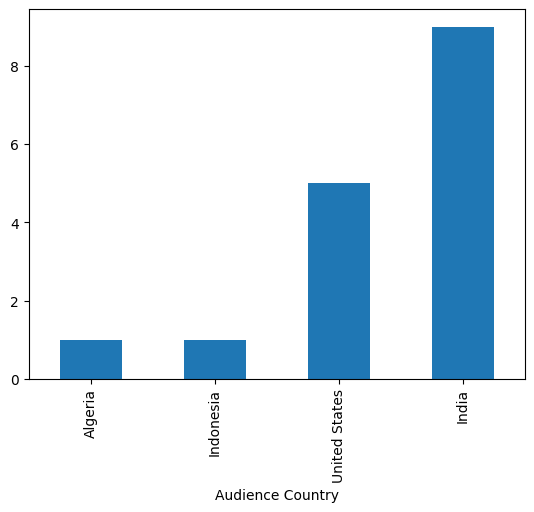

In [ ]:
demand(data_youtube,'Education')

<Axes: xlabel='Audience Country'>

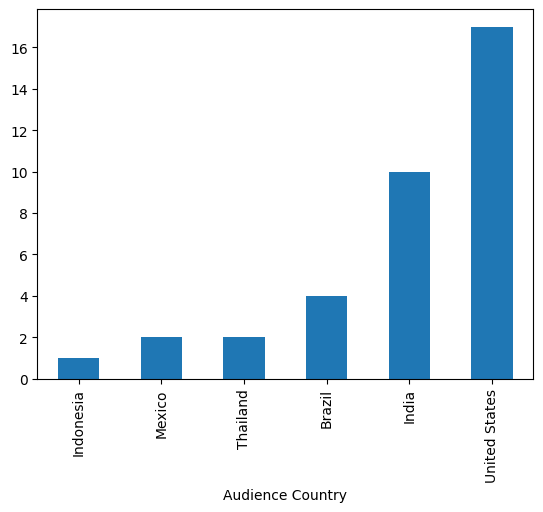

In [ ]:
demand(data_youtube,'Movies')

for a particular category we can choose the country where a huge audience is liking that particular category .¶
for example if you want to make an advertisement of educational app then you can choose India

In [ ]:
data_youtube.columns

Index(['youtuber name', 'Creator Name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'new_Subscribers', 'new_avg views', 'new_avg likes', 'new_avg comments',
       'Engagement rate'],
      dtype='object')

The following line  divides the values in the 'new_Subscribers' column of the data_youtube DataFrame by 1,000,000 to convert the subscriber counts from their original units to millions.

In [ ]:
data_youtube['new_Subscribers']=data_youtube['new_Subscribers']/1000000

In [ ]:
data_youtube['new_Subscribers'].describe()

count    608.000000
mean      17.102467
std       13.688385
min        9.200000
25%       10.900000
50%       13.300000
75%       17.625000
max      212.100000
Name: new_Subscribers, dtype: float64

This code calculates the 90th percentile value of the 'new_Subscribers' column in the 'data_youtube' DataFrame. It returns the value below which 90% of the data falls.

In [ ]:
data_youtube['new_Subscribers'].quantile(0.90)

27.560000000000013

Threshold can be decided by your choice.
Here, I am cosidering that who have >30M subscribers, they are coming the category of mega celebrity

In [ ]:
data_youtube.head(1)

,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212.1,323700,9800,290,0.157


This function for_mini_followers_youtube takes two arguments, coun (country) and cat (category), and performs the following operations:

Filters the data_youtube DataFrame to select rows where the 'Audience Country' column matches the provided country (coun).
Filters the resulting DataFrame (df1) to select rows where the 'new_Subscribers' column is less than or equal to 30, indicating "mini followers."
Sorts the filtered DataFrame (df1_mini) by the 'Engagement rate' column in descending order.
Groups the sorted DataFrame by the 'Category' column and retrieves the group corresponding to the provided category (cat).
Selects the first, fourth, and last columns (iloc[:,[0,3,-1]]) from the grouped DataFrame and returns the result.
This function is designed to extract specific information for a given country and category, focusing on influencers with a smaller number of subscribers.

In [ ]:
def for_mini_followers_youtube(coun,cat):
    df1=data_youtube[data_youtube['Audience Country']==coun]
    df1_mini=df1[df1['new_Subscribers']<=30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

This code groups the data_youtube DataFrame by the 'Category' column and then extracts the first value of the 'Audience Country' column for each group. It shows the first country listed in the 'Audience Country' column for each category.

In [ ]:
data_youtube.groupby('Category')['Audience Country'].first()

Category
ASMR                           Mexico
Animals & Pets          United States
Animation               United States
Autos & Vehicles               Brazil
Beauty                  United States
DIY & Life Hacks               Russia
Daily vlogs                    Mexico
Design/art              United States
Education                       India
Fashion                 United States
Fitness                 United States
Food & Drinks           United States
Health & Self Help      United States
Humor                   United States
Movies                          India
Music & Dance                   India
Mystery                 United States
News & Politics                 India
Science & Technology           Brazil
Sports                         Brazil
Toys                           Brazil
Travel                   Saudi Arabia
Video games             United States
Name: Audience Country, dtype: object

This will filter the data_youtube DataFrame for influencers from the United States with a subscriber count of 30 or less and then sort the results by engagement rate, returning only those in the "Music & Dance" category.

In [ ]:
for_mini_followers_youtube('United States','Music & Dance')

,youtuber name,Subscribers,Engagement rate
860,Juice WRLD,10M,79.277
914,Prince Royce,9.6M,74.629
717,YoungBoy Never Broke Again,10.9M,72.458
861,jordanmatter,10M,50.495
607,Migosatl,11.9M,28.876
625,AvrilLavigne,11.7M,25.102
656,Davie504,11.5M,19.094
711,YMWayneCarter,11.1M,18.963
535,twentyonepilots,12.7M,14.654
146,jypentertainment,24.2M,11.461


This function, for_mega_followers_youtube, filters the data_youtube DataFrame to select influencers with more than 30 subscribers from a specific country (coun). It then sorts the filtered DataFrame by the 'Engagement rate' column in descending order and retrieves the group corresponding to a specific category (cat). Finally, it selects and returns the first, fourth, and last columns of the grouped DataFrame.

In [ ]:
def for_mega_followers_youtube(coun, cat):
    """
    Returns a DataFrame containing influencers with more than 30 subscribers from a specific country and category,
    sorted by engagement rate.

    Args:
        coun (str): The country of the influencers.
        cat (str): The category of the influencers.

    Returns:
        DataFrame: A DataFrame containing the influencers' details (Creator Name, new_Subscribers, Engagement rate).
    """
    df1 = data_youtube[data_youtube['Audience Country'] == coun]
    df1_mega = df1[df1['new_Subscribers'] > 30]
    return df1_mega.sort_values(by='Engagement rate', ascending=False).groupby('Category').get_group(cat).iloc[:, [0, 3, -1]]


This code counts the occurrences of each unique value in the 'Category' column of the data_youtube DataFrame. It returns a Series where the index is the unique category names and the values are the counts of each category in the DataFrame.

In [ ]:
data_youtube['Category'].value_counts()


Category
Music & Dance           195
Video games              82
Animation                62
News & Politics          49
Movies                   36
Daily vlogs              30
Humor                    29
Toys                     22
Science & Technology     17
Education                16
Food & Drinks            16
DIY & Life Hacks         15
Sports                   11
Fashion                   7
Animals & Pets            4
Design/art                4
Fitness                   3
ASMR                      3
Health & Self Help        2
Beauty                    2
Autos & Vehicles          1
Mystery                   1
Travel                    1
Name: count, dtype: int64

In [ ]:
data_youtube['Audience Country'].value_counts()

Audience Country
United States     242
India             109
Brazil             74
Mexico             44
Indonesia          33
Russia             30
Philippines        12
Thailand           10
Colombia            8
Argentina           7
Spain               5
Iraq                4
Saudi Arabia        4
United Kingdom      4
Turkey              3
Pakistan            2
Morocco             2
Japan               2
Peru                2
Algeria             2
Bangladesh          2
Egypt               2
France              2
Ecuador             1
Cyprus              1
Poland              1
Name: count, dtype: int64

In [ ]:
data_youtube

,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212.1,323700,9800,290,0.157
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111.4,1400000,80800,4600,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92.5,30600000,1700000,67700,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86.9,76600,2800,163,0.092
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82.7,108700,4200,155,0.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K,9.2,1400000,110100,2500,16.441
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636,9.2,243800,30700,636,2.991
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874,9.2,296000,10200,874,3.338
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58,9.2,15200,854,58,0.175


In [ ]:
data_youtube.head()

,youtuber name,Creator Name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212.1,323700,9800,290,0.157
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111.4,1400000,80800,4600,1.333
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92.5,30600000,1700000,67700,34.992
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86.9,76600,2800,163,0.092
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155,82.7,108700,4200,155,0.137


In [ ]:
data_youtube.columns

Index(['youtuber name', 'Creator Name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'new_Subscribers', 'new_avg views', 'new_avg likes', 'new_avg comments',
       'Engagement rate'],
      dtype='object')

LINEAR REGRESSION

Mean Squared Error: 353.82127737592214


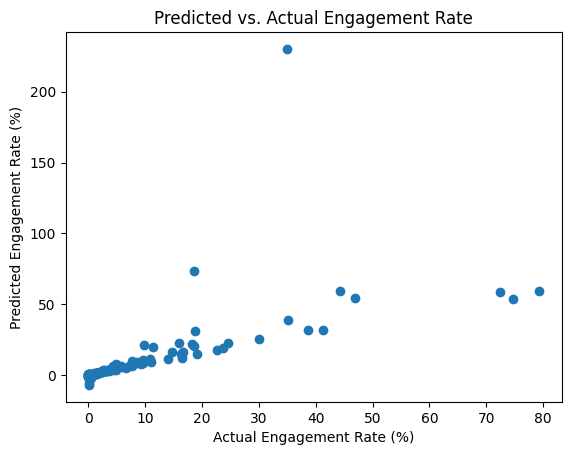

In [ ]:
# Select features and target variable
X = data_youtube[['new_Subscribers', 'new_avg likes', 'new_avg views']]
y = data_youtube['Engagement rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Engagement Rate (%)')
plt.ylabel('Predicted Engagement Rate (%)')
plt.title('Predicted vs. Actual Engagement Rate')
plt.show()

 Clustering using kmeans to identify patterns or clusters in the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
Cluster 1: [-0.1715996  -0.06096341 -0.06317432]
Cluster 2: [3.0925753  0.4386461  0.53217164]
Cluster 3: [-0.29263955 21.01728583 19.29574368]


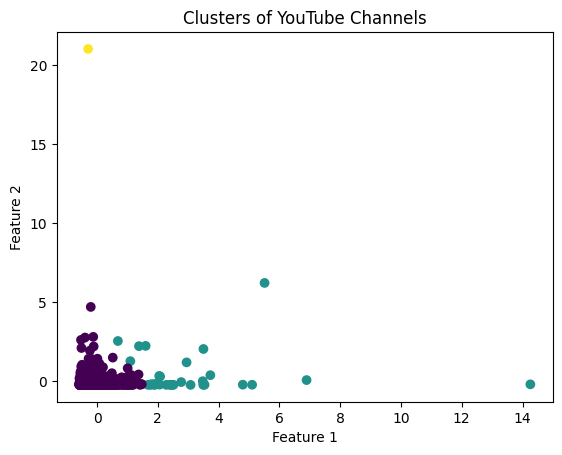

In [ ]:



# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data_youtube['Cluster'] = cluster_labels

# Print the cluster centers
print('Cluster Centers:')
for i in range(num_clusters):
    print(f'Cluster {i + 1}: {kmeans.cluster_centers_[i]}')

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters of YouTube Channels')
plt.show()


UI